In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [2]:
n = 1000

X, y = make_circles(n_samples=n, noise=0.03, random_state=42)

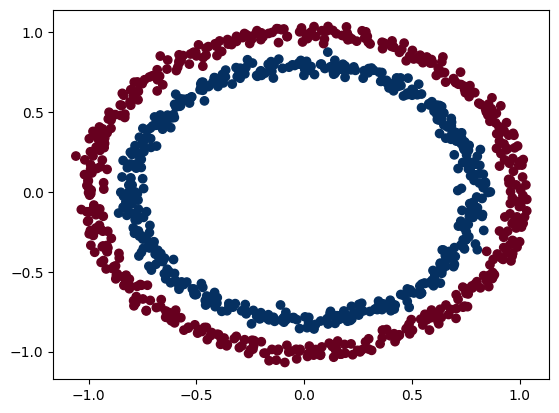

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);


In [4]:
y[:5]

array([1, 1, 1, 1, 0])

In [5]:
X.shape, y.shape


((1000, 2), (1000,))

In [6]:
import torch

In [7]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [8]:
X[:5]

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42
                                                    )

In [10]:
len(X_train)

800

MODEL

In [11]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
device

'cpu'

In [13]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


In [14]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [15]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [16]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [17]:
torch.manual_seed(42)


X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

epochs = 1500

for epoch in range(epochs):

  #set model to training mode
  model_0.train()

  #perform forward pass;
  y_logits_pred = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits_pred))

  #loss and accruacy
  loss_train = loss_fn(y_logits_pred, y_train)
  acc_train = accuracy_fn(y_train, y_pred)

  #remove gradients after each iteration
  optimizer.zero_grad()

  #back propagation
  loss_train.backward()

  optimizer.step()

  #TESTING MODE

  #testing mode
  model_0.eval()

  #disables gradient tracking
  with torch.inference_mode():

    y_test_pred_logits = model_0(X_test).squeeze()
    y_test_pred = torch.round(torch.sigmoid(y_test_pred_logits))

    loss_test = loss_fn(y_test_pred_logits, y_test)
    acc_test = accuracy_fn(y_test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} || Loss Train: {loss_train} || Accuracy for training: {acc_train} || Loss Test: {loss_test} || Accuracy for testing {acc_test}")


Epoch: 0 || Loss Train: 0.6959726810455322 || Accuracy for training: 50.0 || Loss Test: 0.6951814293861389 || Accuracy for testing 50.0
Epoch: 10 || Loss Train: 0.6945105791091919 || Accuracy for training: 50.0 || Loss Test: 0.6938847899436951 || Accuracy for testing 50.0
Epoch: 20 || Loss Train: 0.6936517357826233 || Accuracy for training: 50.0 || Loss Test: 0.6931451559066772 || Accuracy for testing 50.0
Epoch: 30 || Loss Train: 0.6931130290031433 || Accuracy for training: 50.0 || Loss Test: 0.6926975846290588 || Accuracy for testing 50.0
Epoch: 40 || Loss Train: 0.6927486658096313 || Accuracy for training: 50.0 || Loss Test: 0.6924024224281311 || Accuracy for testing 50.0
Epoch: 50 || Loss Train: 0.6924816370010376 || Accuracy for training: 55.00000000000001 || Loss Test: 0.6921980977058411 || Accuracy for testing 54.0
Epoch: 60 || Loss Train: 0.6922720074653625 || Accuracy for training: 55.75 || Loss Test: 0.6920379400253296 || Accuracy for testing 54.0
Epoch: 70 || Loss Train: 0.6

In [18]:
import requests
from pathlib import Path
import matplotlib.pyplot as plt


# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

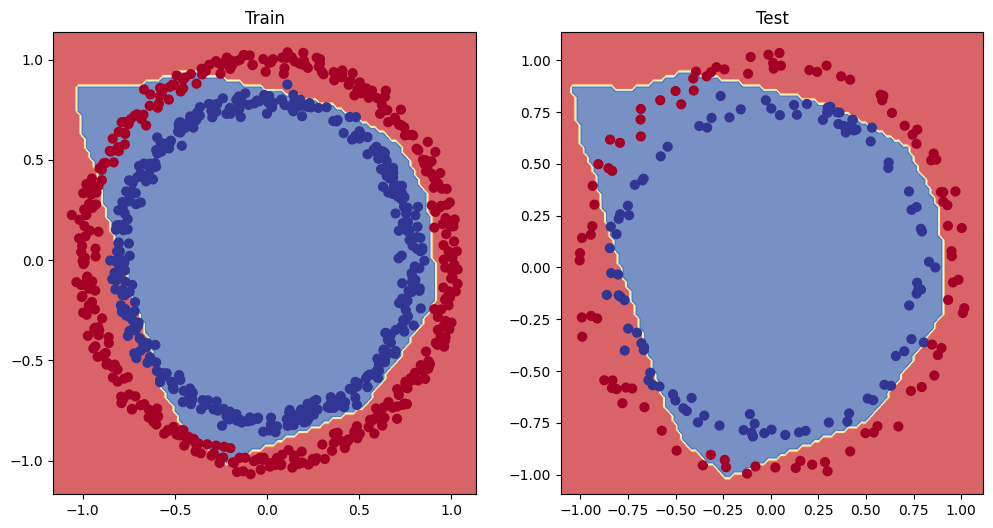

In [19]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)